# Project Capstone Chustomer churn

In [57]:
# Import libreries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [58]:
# Import dataset in csv format

df = pd.read_csv(r"D:\Data Science Exercise\PROJECT--CUSTOMER-CHURN-10JUN2024011609\Capstone-project-2\Dataset\Dataset\customer_churn.csv")

In [59]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [60]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [61]:
## Data Manipulation task

customer_5 = df[["Dependents"]]

In [62]:
customer_15 = df[["StreamingMovies"]]

In [63]:
senior_male_electronic=df[(df["gender"]=="Male") & (df["SeniorCitizen"]==1) & (df["PaymentMethod"]=="Electronic check")]

In [64]:
customer_total_tenure=df[(df["tenure"]>70) | (df["MonthlyCharges"]>100)]

In [65]:
two_mail_yes=df[(df["Contract"]=="Two Year") & (df["PaymentMethod"]=="Mailed check") & (df["Churn"]=="Yes")]

In [66]:
customer_333 = df.sample(n=333)

In [67]:
df["Churn"].value_counts()

No     5174
Yes    1869
Name: Churn, dtype: int64

## Data Visualization

In [68]:
internet_keys = df["InternetService"].value_counts().keys()

In [69]:
internet_value = df["InternetService"].value_counts().values

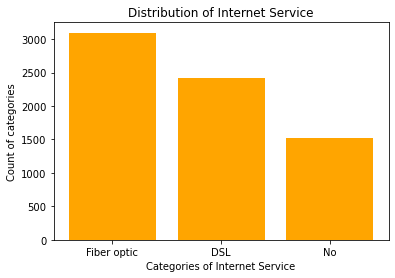

In [70]:
plt.bar(x=internet_keys,height=internet_value,color="orange")
plt.xlabel("Categories of Internet Service")
plt.ylabel("Count of categories")
plt.title("Distribution of Internet Service")
plt.show()

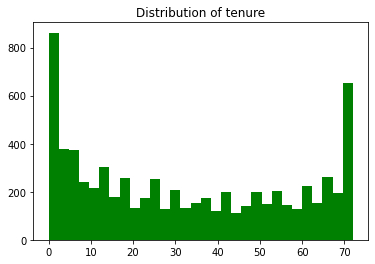

In [71]:
plt.hist(df["tenure"],bins=30,color="green")
plt.title("Distribution of tenure")
plt.show()

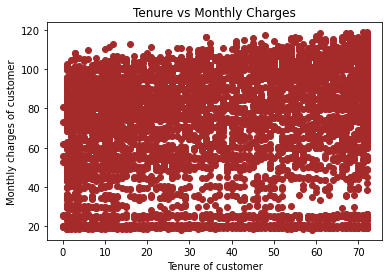

In [72]:
plt.scatter(x=df["tenure"],y=df["MonthlyCharges"],c="brown")
plt.xlabel("Tenure of customer")
plt.ylabel("Monthly charges of customer")
plt.title("Tenure vs Monthly Charges")
plt.show()

<AxesSubplot:title={'center':'tenure'}, xlabel='[Contract]'>

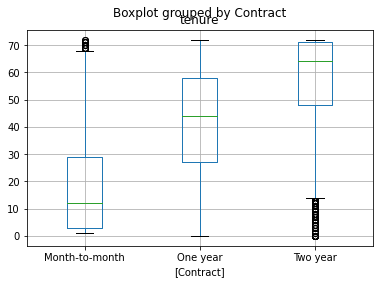

In [73]:
df.boxplot(column=["tenure"],by=["Contract"])

## Machine Learning

In [74]:
X = df[["tenure"]]

In [75]:
y = df[["MonthlyCharges"]]

In [76]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [77]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.30,random_state=63)

In [78]:
lrm = LinearRegression()

In [79]:
lrm.fit(X_train,y_train)

LinearRegression()

In [80]:
y_pred = lrm.predict(X_test)

In [81]:
from sklearn.metrics import accuracy_score,mean_squared_error,mean_absolute_error

In [82]:
np.sqrt(mean_squared_error(y_test,y_pred))

29.063685518548827

In [83]:
mean_absolute_error(y_test,y_pred)

25.301985655550105

#### Logistic Regression 

In [84]:
X = df[["MonthlyCharges"]]
y = df[["Churn"]]

In [85]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.35,random_state=75)

In [86]:
from sklearn.linear_model import LogisticRegression

In [87]:
lrc = LogisticRegression()

In [88]:
lrc.fit(X_train,y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression()

In [89]:
y_pred = lrc.predict(X_test)

In [90]:
from sklearn.metrics import accuracy_score,confusion_matrix

In [91]:
confusion_matrix(y_test,y_pred)

array([[1804,    0],
       [ 662,    0]], dtype=int64)

In [92]:
accuracy_score(y_test,y_pred)

0.7315490673154906

In [93]:
X = df[["MonthlyCharges","tenure"]]
y = df[["Churn"]]

In [94]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.20,random_state=75)

In [95]:
lrc.fit(X_train,y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression()

In [96]:
y_pred = lrc.predict(X_test)

In [97]:
confusion_matrix(y_test,y_pred) , accuracy_score(y_test,y_pred)

(array([[911, 113],
        [207, 178]], dtype=int64),
 0.772888573456352)

#### Decision Tree

In [98]:
X = df[["tenure"]]
y = df[["Churn"]]

In [99]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.20,random_state=32)

In [100]:
from sklearn.tree import DecisionTreeClassifier

In [101]:
dtc = DecisionTreeClassifier()

In [102]:
dtc.fit(X_train,y_train)

DecisionTreeClassifier()

In [103]:
y_pred = dtc.predict(X_test)

In [104]:
confusion_matrix(y_test,y_pred) , accuracy_score(y_test,y_pred)

(array([[931,  65],
        [321,  92]], dtype=int64),
 0.7260468417317246)

#### Random Forest

In [105]:
X = df[["tenure","MonthlyCharges"]]
y = df[["Churn"]]

In [106]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.30,random_state=25)

In [111]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier()

In [112]:
rfc.fit(X_train,y_train)

C:\Users\kshit\AppData\Local\Temp\ipykernel_17316\3302021315.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc.fit(X_train,y_train)


RandomForestClassifier()

In [113]:
y_pred = rfc.predict(X_test)

In [114]:
confusion_matrix(y_test,y_pred),accuracy_score(y_test,y_pred)

(array([[1333,  209],
        [ 303,  268]], dtype=int64),
 0.7576904874585897)